In [2]:
import pandas as pd
import numpy as np

In [13]:
from pycaret.datasets import get_data
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [14]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
from pycaret.regression import *

In [15]:
r2 = setup(data, target = 'charges', session_id = 123,
           normalize = True,
           polynomial_features = True, trigonometry_features = True,
           feature_interaction=True, 
           bin_numeric_features= ['age', 'bmi'])

,Description,Value
0,session_id,123
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(936, 56)"


In [16]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2870.1642,25520388.7838,5035.9923,0.8176,0.4726,0.3468,0.0900
llar,Lasso Least Angle Regression,3204.9946,25995144.1517,5084.2701,0.8165,0.4661,0.3431,0.6570
omp,Orthogonal Matching Pursuit,3167.1362,26343745.1791,5110.6374,0.8158,0.4267,0.3217,0.0060
br,Bayesian Ridge,3239.1070,26157676.2674,5100.7273,0.8151,0.4894,0.3484,0.0070
ridge,Ridge Regression,3236.9930,26221694.4000,5106.8396,0.8147,0.4720,0.3485,0.0100
lasso,Lasso Regression,3236.6367,26363178.0000,5120.5656,0.8138,0.4759,0.3486,0.0110
lr,Linear Regression,3255.0176,26454484.2000,5130.0236,0.8128,0.4695,0.3514,0.6600
lightgbm,Light Gradient Boosting Machine,3066.2845,26755033.4401,5161.6322,0.8075,0.5466,0.3727,0.0410
rf,Random Forest Regressor,2877.8752,26916761.1835,5171.4034,0.8069,0.4931,0.3634,0.2320
par,Passive Aggressive Regressor,2185.1956,28734151.7147,5332.6904,0.7994,0.3991,0.0863,0.0630


In [17]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3151.0962,21991012.0000,4689.4575,0.8687,0.4152,0.3381
1,3385.1018,31392052.0000,5602.8608,0.8175,0.4521,0.3219
2,3062.1013,24014096.0000,4900.4180,0.6960,0.5317,0.3981
3,3077.9016,20251116.0000,4500.1240,0.8309,0.4819,0.4330
4,3404.6836,29684750.0000,5448.3711,0.7792,0.4804,0.3237
5,3209.5762,26000190.0000,5099.0381,0.8327,0.4154,0.3022
6,3067.6243,26809452.0000,5177.7847,0.8176,0.3887,0.3165
7,3551.5642,30967100.0000,5564.8091,0.8297,0.5817,0.3277
8,3265.5073,23366552.0000,4833.8960,0.8491,0.4201,0.3766


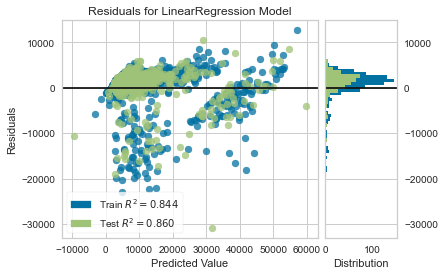

In [18]:
plot_model(lr, plot = 'residuals')

In [12]:
save_model(lr, model_name = 'deployment_28042020')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs',
                  DFS_Classic(interactions=['multiply'], ml_usecase='regression',
                              n_jobs=-1, random_state=123, subclass='binary',
                              target='charges'

In [22]:
deployment_28042020 = load_model('deployment_28042020')

Transformation Pipeline and Model Successfully Loaded


In [23]:
deployment_28042020

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='charges',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy...
                ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                ('dfs',
                 DFS_Classic(interactions=['multiply'], ml_usecase='regression',
                             n_jobs=-1, random_state=123, subclass='binary',
                             target='charges',
               

In [24]:
import requests
url = 'https://pycaret-insurance.herokuapp.com/predict_api'
pred = requests.post(url,json={'age':55, 'sex':'male', 'bmi':59, 'children':1, 'smoker':'male', 'region':'northwest'})
print(pred.json())

75716.0
